In [1]:
% load_ext autoreload
% autoreload 2

import scipy
import numpy as np
import pandas as pd

import geopandas.io.osm as osm

import pandana

import pandana.loaders.osm as osm_load

% matplotlib inline

C:\Users\spm448\Anaconda\DLLs


In [2]:
met_areas = pd.read_table('Gaz_ua_national.txt', header = 0, names = 
                          ['id', 'name', 'type', 'pop','households',
                           'area', 'water', 'area_mi', 'water_mi',
                           'lat', 'lon'])
big_mets = met_areas[met_areas['pop'] > 1000000]
print big_mets[['name', 'area']]
print 'number of metropolitan areas is {}'.format(len(big_mets))

                                                   name        area
137                          Atlanta, GA Urbanized Area  6851428985
160                           Austin, TX Urbanized Area  1354651025
176                        Baltimore, MD Urbanized Area  1857113332
343                   Boston, MA--NH--RI Urbanized Area  4852227548
571                    Charlotte, NC--SC Urbanized Area  1920454942
594                      Chicago, IL--IN Urbanized Area  6326686332
610               Cincinnati, OH--KY--IN Urbanized Area  2040237609
637                        Cleveland, OH Urbanized Area  1999397942
699                         Columbus, OH Urbanized Area  1322092399
800    Dallas--Fort Worth--Arlington, TX Urbanized Area  4607936452
855                   Denver--Aurora, CO Urbanized Area  1729988718
865                          Detroit, MI Urbanized Area  3463234750
1486                         Houston, TX Urbanized Area  4299420988
1515                    Indianapolis, IN Urbaniz

In [3]:
coords = pd.DataFrame()

met_per_lon = 111000
met_per_lat = 88000

coords['name'] = big_mets.name
coords['x_min'] = big_mets.lon - 0.5 * np.sqrt(big_mets.area)/met_per_lon
coords['y_min'] = big_mets.lat - 0.5 * np.sqrt(big_mets.area)/met_per_lat
coords['x_max'] = big_mets.lon + 0.5 * np.sqrt(big_mets.area)/met_per_lon
coords['y_max'] = big_mets.lat + 0.5 * np.sqrt(big_mets.area)/met_per_lat

print coords.head()

                                  name      x_min      y_min      x_max  \
137         Atlanta, GA Urbanized Area -84.704711  33.353799 -83.959005   
160          Austin, TX Urbanized Area -97.927306  30.149386 -97.595724   
176       Baltimore, MD Urbanized Area -76.841878  38.989245 -76.453642   
343  Boston, MA--NH--RI Urbanized Area -71.454482  41.977348 -70.826934   
571   Charlotte, NC--SC Urbanized Area -81.013227  35.000660 -80.618425   

         y_max  
137  34.294405  
160  30.567632  
176  39.478953  
343  42.768916  
571  35.498648  


In [4]:
met_per_lon = 111000
met_per_lat = 91000

pandana.network.reserve_num_graphs(len(big_mets)) # TODO figure out how to delete networks

print 'reserved {} networks'.format(len(big_mets))

reserved 42 networks


In [ ]:
row = big_mets.ix[2330]

met_per_lon = 111000
met_per_lat = 88000

# for row in atlanta
leng = np.sqrt(row['area'])/2

x_min, x_max = row.lon - leng/met_per_lon, row.lon + leng/met_per_lon
y_min, y_max = row.lat - leng/met_per_lat, row.lat + leng/met_per_lat

print x_min, x_max, y_min, y_max

osm_load.h5_from_bbox(y_min, x_min, y_max, x_max, '{}.h5'.format(row['name'].replace(' ', '')))

print 'saved {}'.format(row['name'])

-74.3960332513 -73.5444087487 40.1812529103 41.2554610897
saved New York--Newark, NY--NJ--CT Urbanized Area


In [10]:
def flum(x):
    print 4 * x
    
big_mets = met_areas[met_areas['pop'] > 100000]
    
i = 0

for index, row in big_mets.iterrows():
    if i < 5:
        flum(row['area'])
        i += 1

1358505856
567024216
2478865780
3370891672
3063771364


In [62]:
osm_load.h5_from_bbox(39.299, -76.469, 39.718, -76.137, 'test.h5')

In [21]:
import matplotlib.pyplot as plt

594.03276718 278088457.141


(0, 10000000000L)

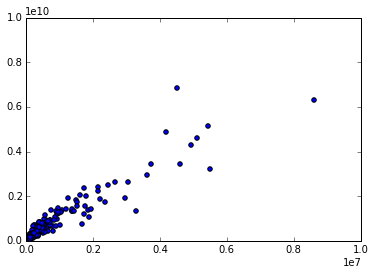

In [26]:
bigs = met_areas[met_areas.POP10 > 100000]

plt.scatter(bigs['POP10'], bigs['ALAND'])
a, b = np.polyfit(bigs['POP10'], bigs['ALAND'], 1)
print a, b
plt.xlim([0, 10000000])
plt.ylim([0, 10000000000])

In [38]:
met_areas = met_areas[met_areas['pop'] > 100000]
print met_areas.head()
print met_areas['lon']

     id                                               name type     pop  \
6   199  Aberdeen--Bel Air South--Bel Air North, MD Urb...    U  213751   
9   280                         Abilene, TX Urbanized Area    U  110421   
18  631  Aguadilla--Isabela--San Sebasti�n, PR Urbanize...    U  306196   
23  766                           Akron, OH Urbanized Area    U  569499   
30  970             Albany--Schenectady, NY Urbanized Area    U  594962   

    households       area     water  area_mi  water_mi        lat        lon  
6        83721  339626464   9825290  131.131     3.794  39.508977 -76.303430  
9        46732  141756054    988193   54.732     0.382  32.428466 -99.747188  
18      138431  619716445    902076  239.274     0.348  18.369286 -67.040259  
23      257659  842722918  17432485  325.377     6.731  41.066225 -81.491897  
30      266370  765942841  16280778  295.732     6.286  42.746355 -73.800509  
6       -76.303430
9       -99.747188
18      -67.040259
23      -81.491897

In [ ]:
osm_load.h5_from_bbox(40.7090, -74.0142, 40.7668, -73.9738, 'manhattan.h5')

In [5]:
store = pd.HDFStore('Aberdeen--BelAirSouth--BelAirNorth,MDUrbanizedArea.h5', 'r')

In [7]:
nodes = store['nodes']
edges = store['edges']

print nodes.head()
print edges.head()

                  x          y
id                            
37018114 -76.452710  39.317318
37018259 -76.410670  39.338874
37018275 -76.410172  39.337958
37018562 -76.461802  39.335190
37019669 -76.465260  39.463479
       from         to    distance
0  37018114   37558452   43.946998
1  37018114  966516834  238.373866
2  37018259   37018275  110.523582
3  37018259   37471712   28.853039
4  37018562   37636492  191.273892
